## Observe the github repo and Speech accent dataset
    https://github.com/caizexin/tf_multispeakerTTS_fc/tree/main
    https://www.kaggle.com/datasets/rtatman/speech-accent-archive
    
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import os

## After extracting embeddings for each speaker, load them and corresponding informations from speakers_all.csv file.

In [29]:
X = []
X_name = []
for file in os.listdir('datasets/syn_accent/synthesizer/embeds/'):
    name = file[6:-4]
    embed=np.load('datasets/syn_accent/synthesizer/embeds/embed-' + name + '.npy')
    X.append(embed)
    X_name.append(name)

In [140]:


# Load the CSV file into a DataFrame
file_path = '/home/marinjezidzic/Downloads/archive/speakers_all.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Extract the content of the 'sex' column
gender_column = df['sex']
filename = df['filename']
# Print the content of the 'sex' column
array1 = filename.to_numpy()
array2 = np.array(X_name)
intersection = np.intersect1d(array1, array2)

# Get the indexes in both arrays
index_pairs = [(np.where(array1 == val)[0][0], np.where(array2 == val)[0][0]) for val in intersection]
first_elem = [x for x,y in index_pairs]
second_elem = [y for x,y in index_pairs]
# Print the results
print("Original array1:", array1)
print("Original array2:", array2)
print("Intersection:", intersection)
print("Index pairs:", index_pairs)

### Project to 2D using TSNE

In [1]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform( X )

### Visualize

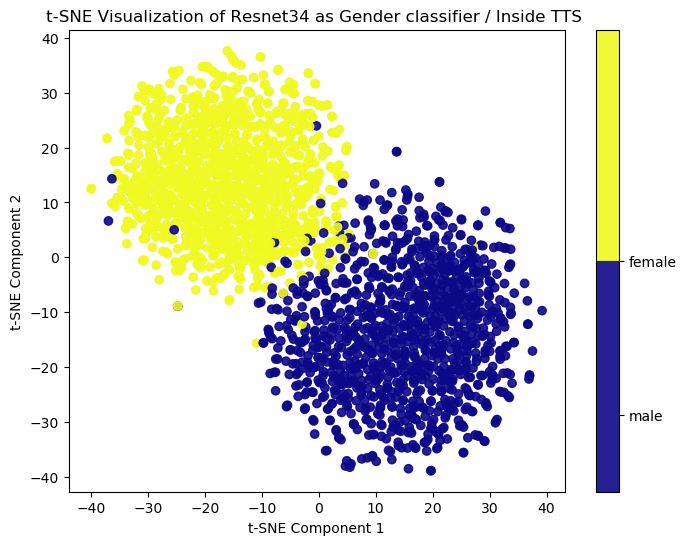

In [150]:
plt.figure(figsize=(8, 6))
gender_column = gender_column.map({'male': 0, 'female': 1})
y = np.array(gender_column)
y=y[first_elem]
scatter = plt.scatter(X_tsne[second_elem, 0], X_tsne[second_elem, 1],c=y, cmap=plt.cm.get_cmap('plasma', 2), alpha=0.9)
cbar = plt.colorbar(scatter, ticks=range(2))
cbar.set_ticklabels(['male', 'female'])
plt.clim(-0.5, 2.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Resnet34 as Gender classifier / Inside TTS ')
plt.show()